In [ ]:
import pandas as pd

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
dia_130 = fetch_ucirepo(id=296)
# metadata
print("A metadata Description")
print(dia_130.metadata)

print(dia_130.shape)

#variable information
print(dia_130.variables)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


A metadata Description
{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control.

In [ ]:
# data (as pandas dataframes)
X_130 = dia_130.data.features
y_130 = dia_130.data.targets

print("DataFrame")
pandas_df = pd.DataFrame(X_130, columns=dia_130.feature_names)
pandas_df.drop(['weight','payer_code','medical_specialty'], axis = 1, inplace = True)
pandas_df = pandas_df.dropna(subset=['race','diag_1', 'diag_2', 'diag_3'])
y_130_aligned = y_130.loc[pandas_df.index]
print(pandas_df.shape)
print("Features and number of NaN values per feature/column")
v1_130 = pandas_df.isnull().sum()
print(v1_130)
print(y_130_aligned)
print(y_130_aligned.shape)


DataFrame
(98053, 44)
Features and number of NaN values per feature/column
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                 

In [ ]:
print(pandas_df.head())
print(pandas_df.dtypes)

              race  gender      age  admission_type_id  \
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   
5        Caucasian    Male  [50-60)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   
5                         1                    2                 3   

   num_lab_procedures  num_procedures  num_medications  ...  examide  \
1                  59               0               18  ...       No   
2                  11               5               13  ...       No   
3             

In [ ]:
pandas_df_tar = pd.DataFrame(y_130_aligned, columns=dia_130.target_names)
print(pandas_df_tar.shape)
print(pandas_df_tar.isnull().sum())

(98053, 1)
readmitted    0
dtype: int64


map diagnosis codes to categories

In [ ]:
# Step 1: Read the CSV and create the mapping dictionary
icd_9_codes_url = 'https://raw.githubusercontent.com/brotaur/MLdiabetes/main/Converstion%20table2.csv'
icd_9_codes_df = pd.read_csv(icd_9_codes_url, encoding='ISO-8859-1')
icd_9_code_mapping = icd_9_codes_df.set_index('Diag Code')['Diag Category'].to_dict()

# Step 2: Apply the mapping to your DataFrame
icd_9_columns = ['diag_1', 'diag_2', 'diag_3']

for column in icd_9_columns:
    pandas_df[column] = pandas_df[column].map(icd_9_code_mapping)

# At this point, diag_1, diag_2, and diag_3 in your DataFrame have been replaced
# with their corresponding diagnostic categories from the CSV
print(pandas_df)


                   race  gender      age  admission_type_id  \
1             Caucasian  Female  [10-20)                  1   
2       AfricanAmerican  Female  [20-30)                  1   
3             Caucasian    Male  [30-40)                  1   
4             Caucasian    Male  [40-50)                  1   
5             Caucasian    Male  [50-60)                  2   
...                 ...     ...      ...                ...   
101761  AfricanAmerican    Male  [70-80)                  1   
101762  AfricanAmerican  Female  [80-90)                  1   
101763        Caucasian    Male  [70-80)                  1   
101764        Caucasian  Female  [80-90)                  2   
101765        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
2                              1                    7                 2   
3                 

In [ ]:
# Step 2: Inspect unique values after mapping
print("Unique categories in 'diag_1' after mapping:", pandas_df['diag_1'].unique()[:10])

# Step 3: Sample rows check
print("Sample rows from the DataFrame:")
print(pandas_df[['diag_1', 'diag_2', 'diag_3']].sample(5))

# Step 4: Check for unmapped codes (assuming all codes should be mapped)
unmapped_check = pandas_df[['diag_1', 'diag_2', 'diag_3']].isnull().any()
print("Columns with unmapped codes:", unmapped_check)


Unique categories in 'diag_1' after mapping: ['Other metabolic and immunity disorders'
 'Complications Mainly Related To Pregnancy'
 'Intestinal infectious diseases'
 'Malignant neoplasm of other and unspecified sites'
 'Ischemic Heart Disease' 'Other Forms Of Heart Disease'
 'Chronic Rheumatic Heart Disease' 'Cerebrovascular Disease'
 'Diabetes mellitus'
 'Malignant neoplasm of digestive organs and peritoneum']
Sample rows from the DataFrame:
                                                  diag_1  \
23357  Persons Encountering Health Services For Speci...   
62594                                       Dorsopathies   
50506                                  Diabetes mellitus   
83905                       Other Forms Of Heart Disease   
33821  Complications Of Surgical And Medical Care, No...   

                                                  diag_2  \
23357  Malignant neoplasm of lymphatic and hematopoie...   
62594                                       Dorsopathies   
50506      

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize one LabelEncoder per column to keep track of the mappings
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()

# Apply Label Encoding for 'diag_1', 'diag_2', 'diag_3'
pandas_df['diag_1_encoded'] = label_encoder_diag_1.fit_transform(pandas_df['diag_1'])
pandas_df['diag_2_encoded'] = label_encoder_diag_2.fit_transform(pandas_df['diag_2'])
pandas_df['diag_3_encoded'] = label_encoder_diag_3.fit_transform(pandas_df['diag_3'])

# Display the first few rows to verify the encoded columns
print(pandas_df[['diag_1', 'diag_1_encoded', 'diag_2', 'diag_2_encoded', 'diag_3', 'diag_3_encoded']].head())
print(pandas_df)


                                              diag_1  diag_1_encoded  \
1             Other metabolic and immunity disorders              98   
2          Complications Mainly Related To Pregnancy              15   
3                     Intestinal infectious diseases              57   
4  Malignant neoplasm of other and unspecified sites              66   
5                             Ischemic Heart Disease              59   

                                              diag_2  diag_2_encoded  \
1                                  Diabetes mellitus              28   
2                                  Diabetes mellitus              28   
3                                  Diabetes mellitus              28   
4  Malignant neoplasm of digestive organs and per...              74   
5                             Ischemic Heart Disease              69   

                                              diag_3  diag_3_encoded  
1                        Disorders of adrenal glands           

In [ ]:
label_encoder_race = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_change = LabelEncoder()
label_encoder_diabetesMed = LabelEncoder()

# Apply Label Encoding for race, gender, change, and diabetesMed
pandas_df['race'] = label_encoder_diag_1.fit_transform(pandas_df['race'])
pandas_df['gender'] = label_encoder_diag_2.fit_transform(pandas_df['gender'])
pandas_df['change'] = label_encoder_diag_3.fit_transform(pandas_df['change'])
pandas_df['diabetesMed'] = label_encoder_diag_1.fit_transform(pandas_df['diabetesMed'])


print(pandas_df[['race', 'gender', 'change','diabetesMed']].head())

   race  gender  change  diabetesMed
1     2       0       0            1
2     0       0       1            1
3     2       1       0            1
4     2       1       0            1
5     2       1       1            1


In [ ]:
pandas_df.dtypes

race                         int64
gender                       int64
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Mapping
age_mapping = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7,'[80-90)':8, '[90-100)':9}
max_glu_serum_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
A1Cresult_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
metformin_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
repaglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
nateglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
chlorpropamide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glimepiride_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acetohexamide_mapping = {'No':0, 'Steady': 1}
glipizide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glyburide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
tolbutamide_mapping = {'No':0, 'Steady': 1}
pioglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
rosiglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acarbose_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
miglitol_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
troglitazone_mapping = {'No':0, 'Steady': 1}
tolazamide_mapping = {'No':0, 'Steady': 1, 'Up':2}
examide_mapping = {'No':0}
citoglipton_mapping = {"No": 0}
insulin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glyburide_metformin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glipizide_metformin_mapping = {"No": 0, "Steady": 1}
glimepiride_pioglitazone_mapping = {"No": 0, "Steady": 1}
metformin_rosiglitazone_mapping = {'No':0}
metformin_pioglitazone_mapping = {'No':0, 'Steady': 1}

# Applying mapping
pandas_df['age'] = pandas_df['age'].map(age_mapping)
pandas_df['max_glu_serum'] = pandas_df['max_glu_serum'].map(max_glu_serum_mapping)
pandas_df['A1Cresult'] = pandas_df['A1Cresult'].map(A1Cresult_mapping)
pandas_df['metformin'] = pandas_df['metformin'].map(metformin_mapping)
pandas_df['repaglinide'] = pandas_df['repaglinide'].map(repaglinide_mapping)
pandas_df['nateglinide'] = pandas_df['nateglinide'].map(nateglinide_mapping)
pandas_df['chlorpropamide'] = pandas_df['chlorpropamide'].map(chlorpropamide_mapping)
pandas_df['glimepiride'] = pandas_df['glimepiride'].map(glimepiride_mapping)
pandas_df['acetohexamide'] = pandas_df['acetohexamide'].map(acetohexamide_mapping)
pandas_df['glipizide'] = pandas_df['glipizide'].map(glipizide_mapping)
pandas_df['glyburide'] = pandas_df['glyburide'].map(glyburide_mapping)
pandas_df['tolbutamide'] = pandas_df['tolbutamide'].map(tolbutamide_mapping)
pandas_df['pioglitazone'] = pandas_df['pioglitazone'].map(pioglitazone_mapping)
pandas_df['rosiglitazone'] = pandas_df['rosiglitazone'].map(rosiglitazone_mapping)
pandas_df['acarbose'] = pandas_df['acarbose'].map(acarbose_mapping)
pandas_df['miglitol'] = pandas_df['miglitol'].map(miglitol_mapping)
pandas_df['troglitazone'] = pandas_df['troglitazone'].map(troglitazone_mapping)
pandas_df['tolazamide'] = pandas_df['tolazamide'].map(tolazamide_mapping)
pandas_df['examide'] = pandas_df['examide'].map(examide_mapping)
pandas_df['citoglipton'] = pandas_df['citoglipton'].map(citoglipton_mapping)
pandas_df['insulin'] = pandas_df['insulin'].map(insulin_mapping)
pandas_df['glyburide-metformin'] = pandas_df['glyburide-metformin'].map(glyburide_metformin_mapping)
pandas_df['glipizide-metformin'] = pandas_df['glipizide-metformin'].map(glipizide_metformin_mapping)
pandas_df['glimepiride-pioglitazone'] = pandas_df['glimepiride-pioglitazone'].map(glimepiride_pioglitazone_mapping)
pandas_df['metformin-rosiglitazone'] = pandas_df['metformin-rosiglitazone'].map(metformin_rosiglitazone_mapping)
pandas_df['metformin-pioglitazone'] = pandas_df['metformin-pioglitazone'].map(metformin_pioglitazone_mapping)

In [ ]:
pandas_df.dtypes

race                         int64
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone        

In [ ]:
pandas_df_numeric = pandas_df.drop(columns=['diag_1', 'diag_2', 'diag_3'])
pandas_df_numeric.dtypes

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
miglitol                    int64
troglitazone  

In [ ]:
 pandas_df_numeric.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin   

In [ ]:
pandas_df_numeric.shape

(98053, 44)

In [ ]:
pandas_df_numeric

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_encoded,diag_2_encoded,diag_3_encoded
1,2,0,1,1,1,7,3,59,0,18,...,0,0,0,0,0,0,1,98,28,42
2,0,0,2,1,1,7,2,11,5,13,...,0,0,0,0,0,1,1,15,28,119
3,2,1,3,1,1,7,2,44,1,16,...,0,0,0,0,0,0,1,57,28,59
4,2,1,4,1,1,7,1,51,0,8,...,0,0,0,0,0,0,1,66,74,29
5,2,1,5,2,1,2,3,31,6,16,...,0,0,0,0,0,1,1,59,69,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,...,0,0,0,0,0,0,1,22,130,36
101762,0,0,8,1,4,5,5,33,3,18,...,0,0,0,0,0,1,1,85,116,137
101763,2,1,7,1,1,7,1,53,0,9,...,0,0,0,0,0,0,1,83,105,130
101764,2,0,8,2,3,7,10,45,2,21,...,0,0,0,0,0,0,1,17,8,24


In [ ]:
pandas_df_tar

,readmitted
1,>30
2,NO
3,NO
4,NO
5,>30
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [ ]:
# prompt: Using dataframe pandas_df_tar: replace the categories >30 and NO by 0, and <30 by 1 and save this df as pandas_df_tar_binom

pandas_df_tar_binom = pandas_df_tar.copy()
pandas_df_tar_binom['readmitted'] = pandas_df_tar_binom['readmitted'].replace({'>30': 0, 'NO': 0, '<30': 1})
pandas_df_tar_binom['readmitted'].value_counts()

0    86987
1    11066
Name: readmitted, dtype: int64

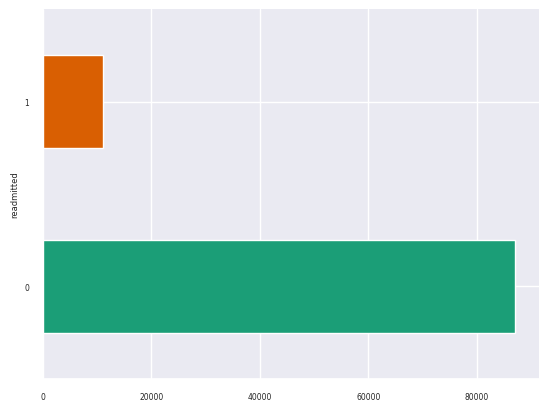

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
pandas_df_tar_binom.groupby('readmitted').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

looking at descriptions of the data

In [ ]:
pandas_df_numeric.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_encoded,diag_2_encoded,diag_3_encoded
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,...,98053.000000,98053.000000,98053.000000,98053.0,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,1.659011,0.461189,6.126034,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,16.119650,...,0.006945,0.000133,0.000010,0.0,0.000010,0.538219,0.768472,62.143065,75.532926,72.977502
std,0.860882,0.498514,1.559075,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,8.108476,...,0.084871,0.011514,0.003194,0.0,0.003194,0.498540,0.421811,35.572248,38.924197,38.782626
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,23.000000,28.000000,29.000000
50%,2.000000,0.000000,6.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,59.000000,87.000000,69.000000
75%,2.000000,1.000000,7.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,92.000000,108.000000,108.000000
max,4.000000,2.000000,9.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,...,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,120.000000,143.000000,143.000000


Try some correlation analysis

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Highly collinear features:
['age', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'change', 'diabetesMed']


<ipython-input-76-d7af4135a011>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  vif_barplot.set_xticklabels(vif_barplot.get_xticklabels(), fontsize=10)
<ipython-input-76-d7af4135a011>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  vif_barplot.set_yticklabels(vif_barplot.get_yticklabels(), fontsize=10)


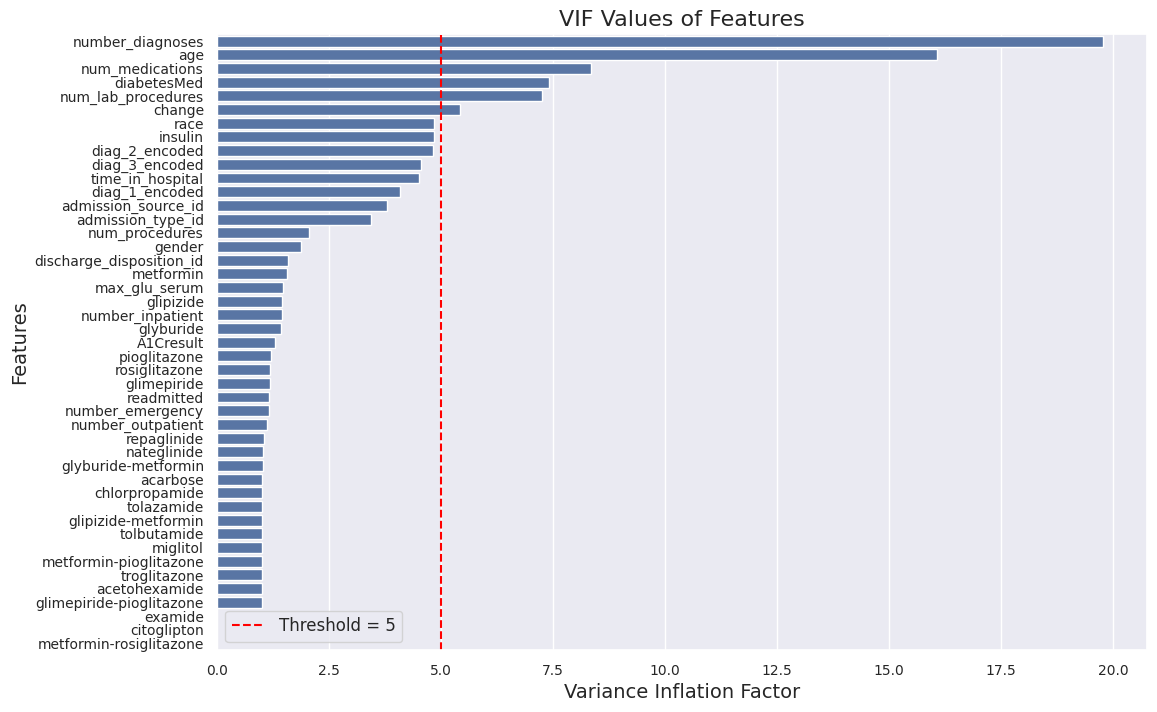

In [ ]:
# prompt: merge pandas_df_numeric and pandas_df_tar_binom, and then generate a vif matrix and identify highly collinear features

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Merge pandas_df_numeric and pandas_df_tar_binom
df_merged = pd.merge(pandas_df_numeric, pandas_df_tar_binom, left_index=True, right_index=True)

# Generate VIF matrix
vif_df = pd.DataFrame()
vif_df["features"] = df_merged.columns
vif_df["vif_value"] = [vif(df_merged.values, i) for i in range(df_merged.shape[1])]

# Identify highly collinear features
threshold = 5
high_vif_features = vif_df[vif_df["vif_value"] > threshold]["features"].tolist()

# Print the highly collinear features
print("Highly collinear features:")
print(high_vif_features)

plt.figure(figsize=(12, 8))
vif_barplot = sns.barplot(x='vif_value', y='features', data=vif_df.sort_values('vif_value', ascending=False))
plt.title('VIF Values of Features', fontsize=16)
plt.xlabel('Variance Inflation Factor', fontsize = 14)
plt.ylabel('Features', fontsize = 14)
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.legend(fontsize=12)
vif_barplot.set_xticklabels(vif_barplot.get_xticklabels(), fontsize=10)
vif_barplot.set_yticklabels(vif_barplot.get_yticklabels(), fontsize=10)
plt.show()



Pairs of features with high correlation (threshold 0.4):
admission_source_id, max_glu_serum
time_in_hospital, num_medications
insulin, change
insulin, diabetesMed
change, diabetesMed


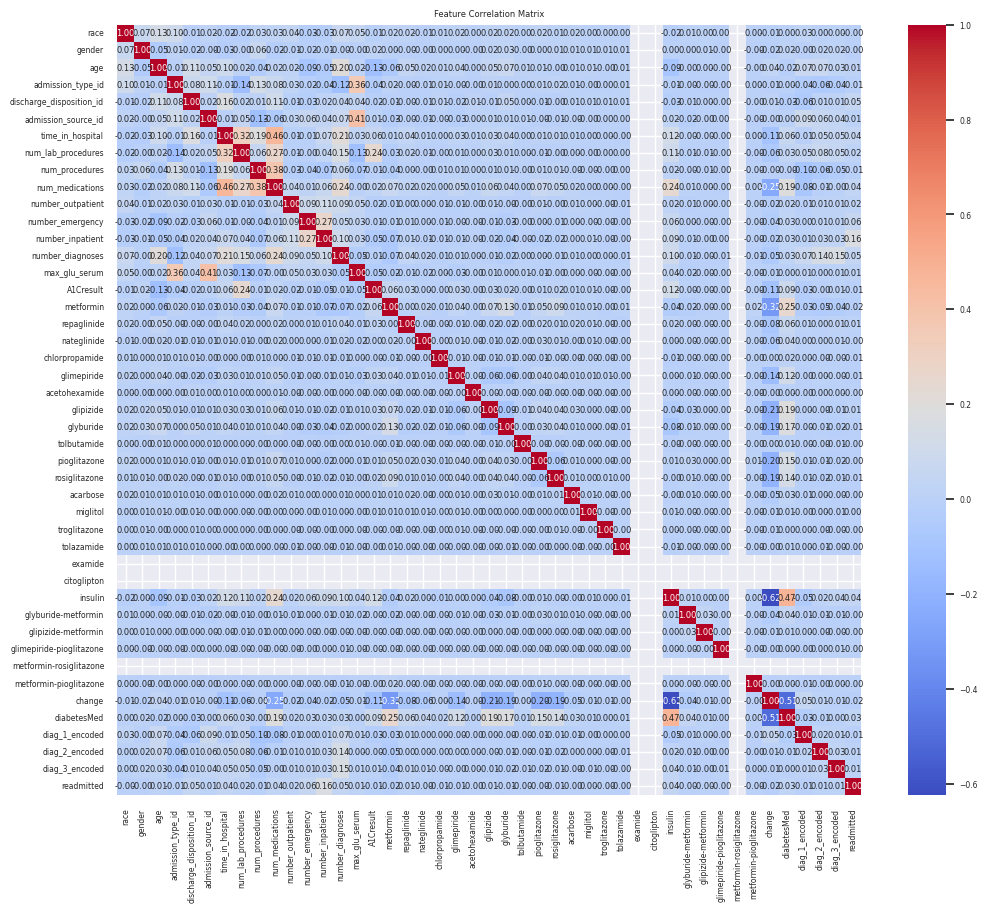

In [ ]:
# prompt: in df_merged, generate a correlation matrix and identify the pairs of features with high correlation, threshold being 0.4

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df_merged.corr()

# Select the pairs of features with high correlation
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.4:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print the pairs of features with high correlation
print("Pairs of features with high correlation (threshold 0.4):")
for pair in high_correlation_pairs:
    print(f"{pair[0]}, {pair[1]}")

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


That looks rough, lets try this:

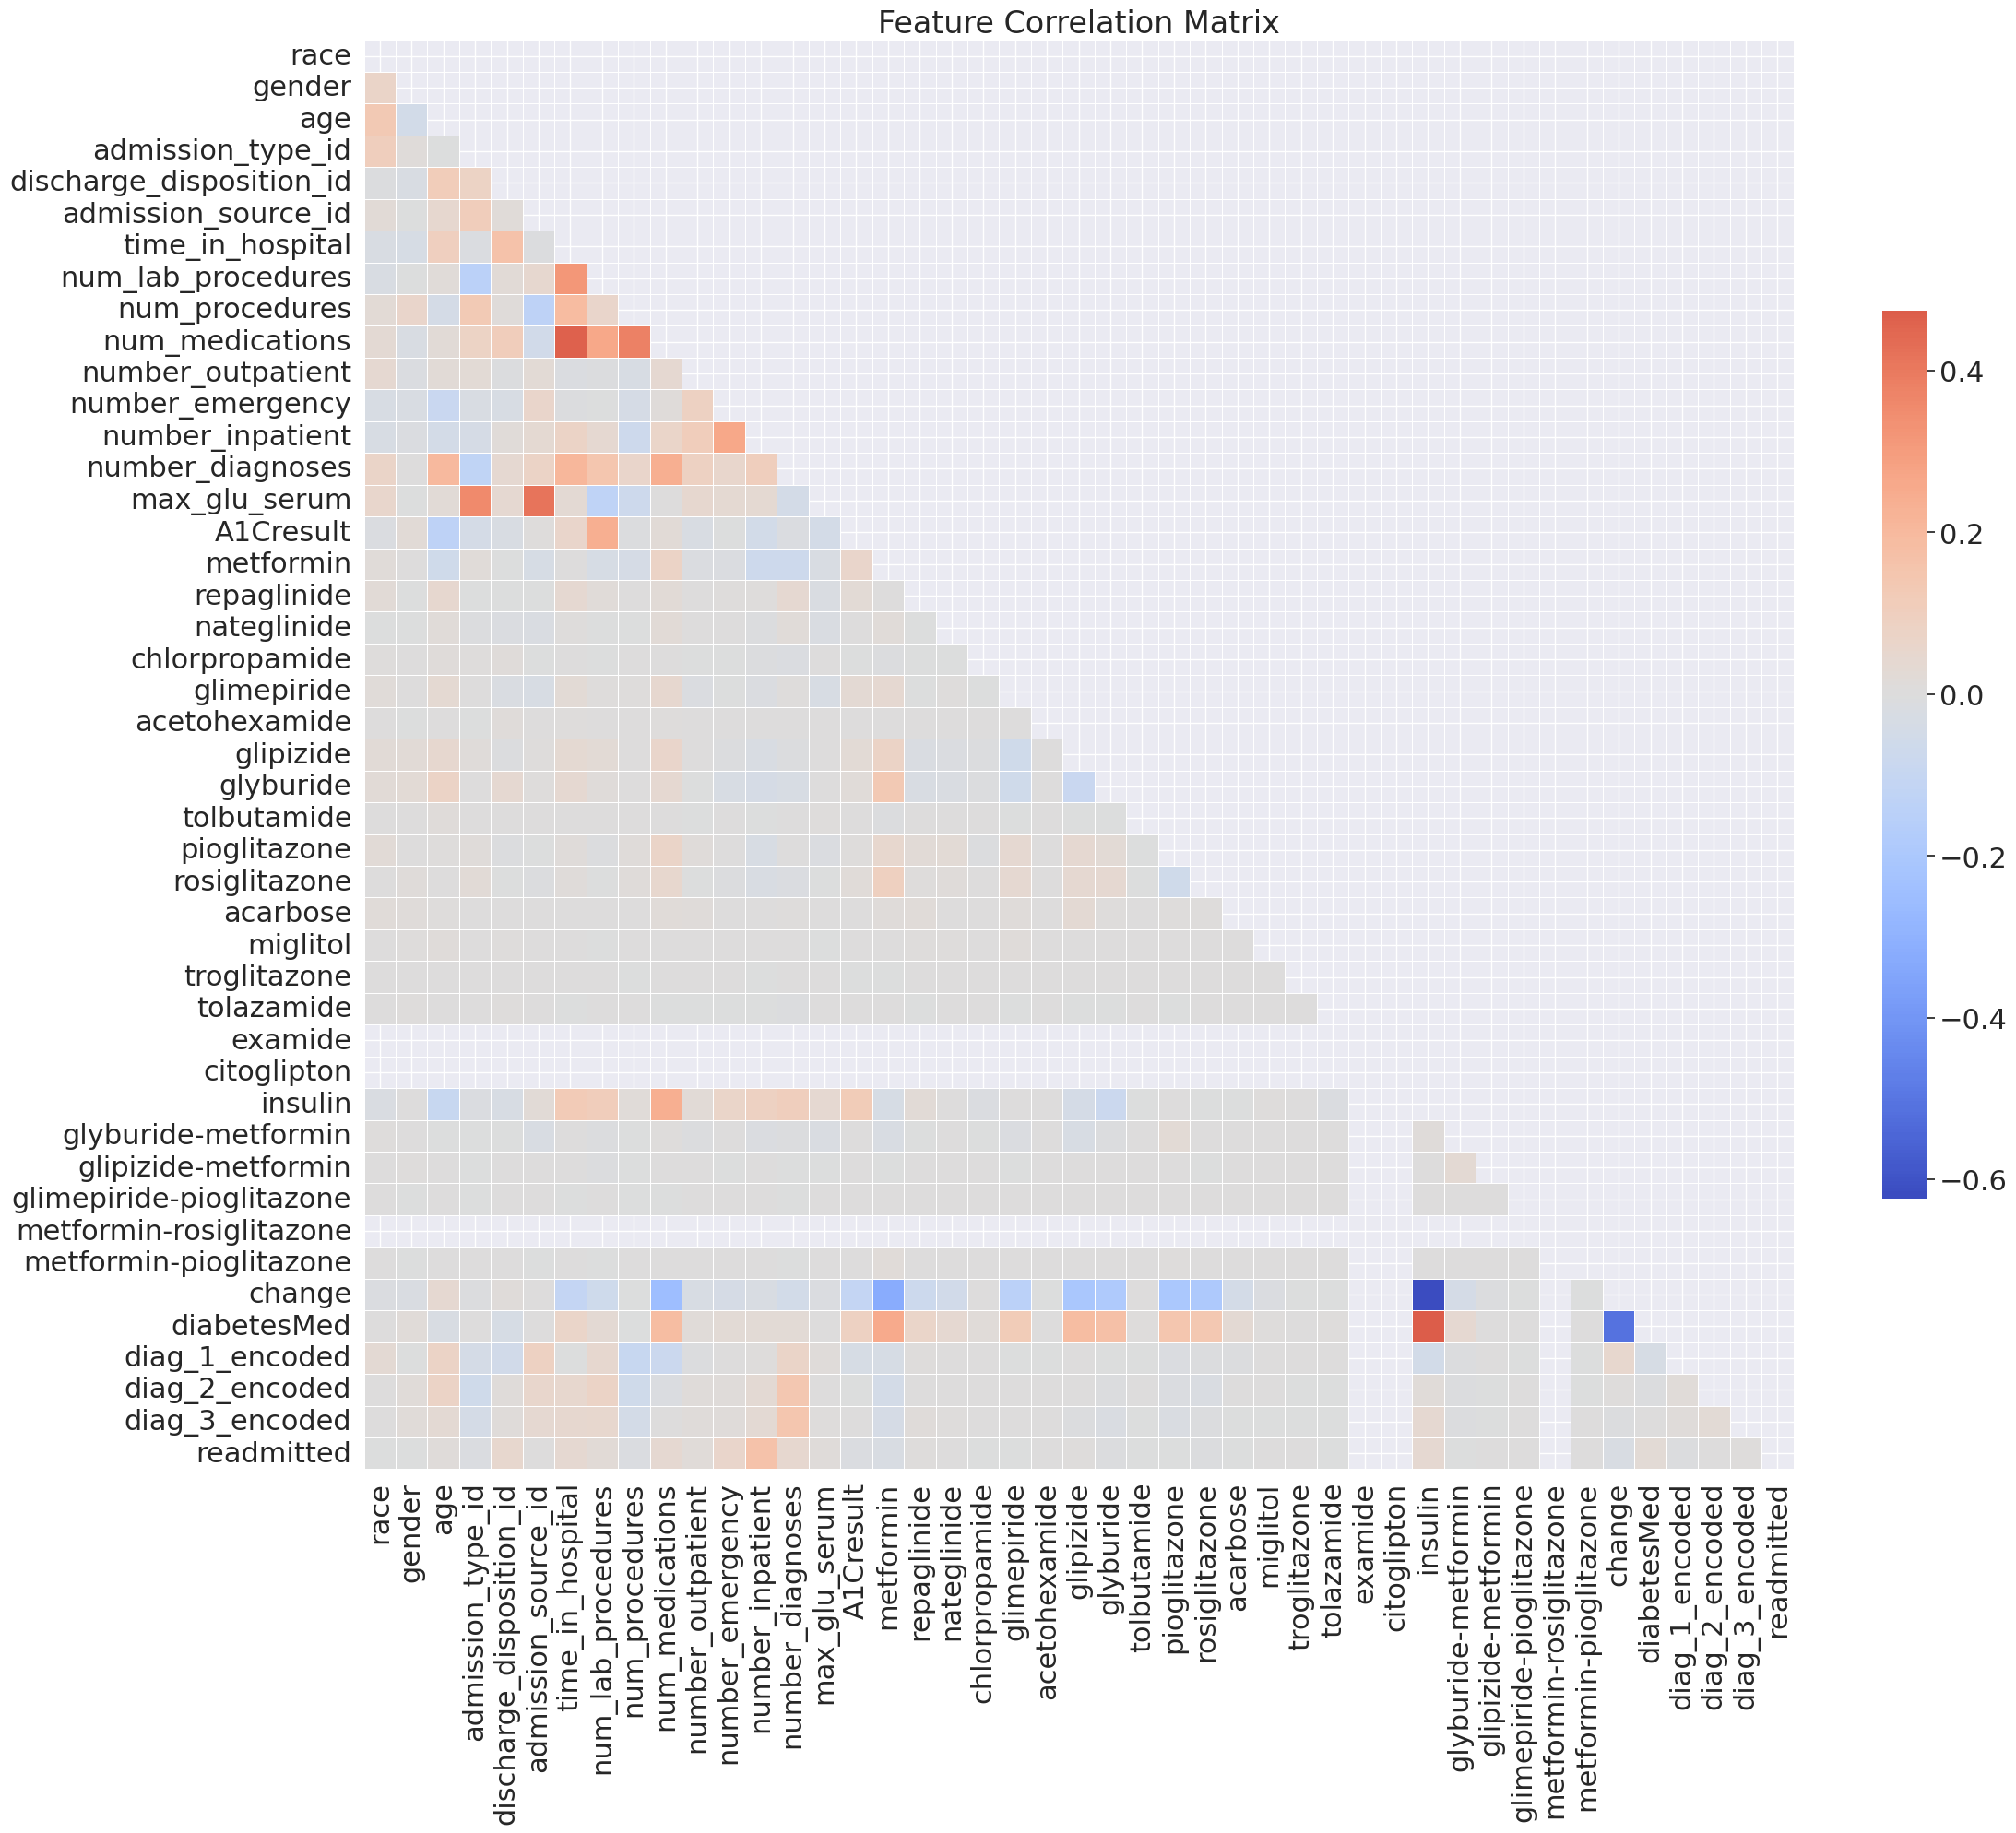

In [87]:
# Increase the size of the heatmap.
plt.figure(figsize=(25, 25))

# Calculate the correlation matrix
corr = df_merged.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Adjust the font size of the annotations if you wish to keep them.
sns.set(font_scale= 2)
plt.title('Feature Correlation Matrix')

plt.show()


split data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X = pandas_df_numeric
#y = pandas_df_tar
y = pandas_df_tar_binom

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% of data for testing

PCA attempt, had to modify a few pieces of code from previous workbook and removed sampling strategy hyperparameter

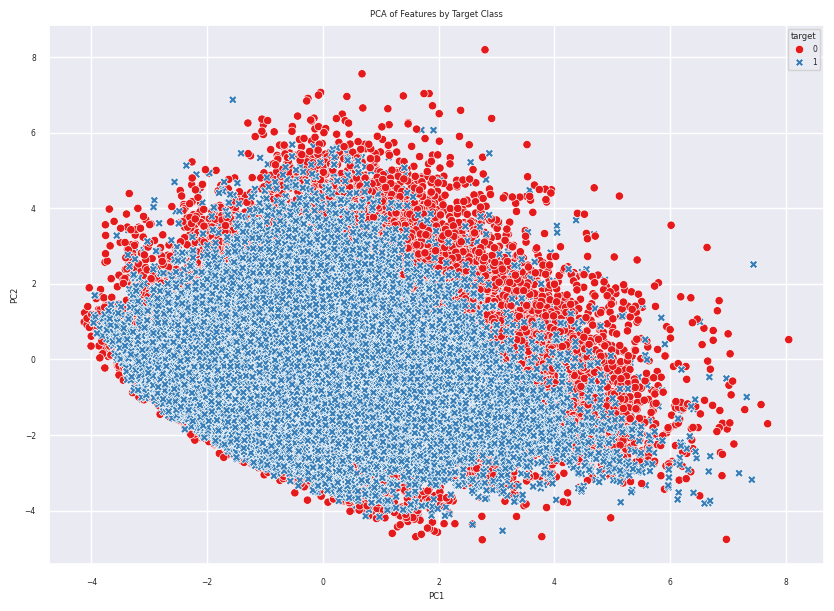

In [ ]:
#Smote application to training data
smt = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

#PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

assert X_train_pca.shape[0] == y_train_smote.shape[0], "Mismatch in the number of samples "

# Visualization
df_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y_train_smote.values  # Should work without error if above assert passes

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, style='target', palette='Set1')
plt.title('PCA of Features by Target Class')
plt.show()

UMAP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1e122ee2101621d2a669a80c8d96fbd1efd3cf17d428a1002b02bfbf74422fdd
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


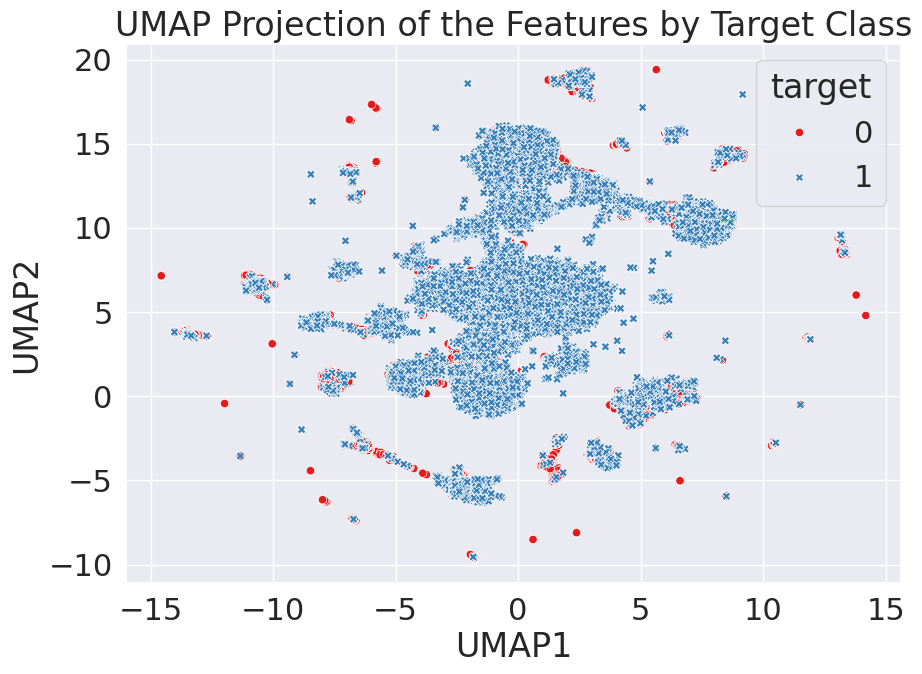

In [88]:
!pip install umap-learn
import umap

# UMAP
umap_reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1, n_components=2)
X_train_umap = umap_reducer.fit_transform(X_train_scaled)

# The assert statement checks if the number of rows is the same for both datasets
assert X_train_umap.shape[0] == y_train_smote.shape[0], "Mismatch in the number of samples"

# Visualization
df_umap = pd.DataFrame(X_train_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = y_train_smote.values

plt.figure(figsize=(10, 7))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='target', data=df_umap, style='target', palette='Set1')
plt.title('UMAP Projection of the Features by Target Class')
plt.show()